In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [2]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [3]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [33]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x
        for i in range(y.size):
            for k in range(randint(0,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [34]:
x_n, y_n=make_noise(x,y)

In [35]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [36]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [37]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [38]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [31]:
## Run LR on original features!
#orig_lr2 = LRGD(alpha=10.0, step_size=0.1)
#orig_lr2.fit(x_te, y_te)

In [32]:
#y_hat_Origin=np.asarray(orig_lr2.predict_proba(x_va)[:,1]).reshape(-1)
#tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
#acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
#print("Origin Accuracy", acc)

In [30]:
## Run LR on transformed features!
#new_lr2 = LRGDF(alpha=10.0, step_size=0.1)
#new_lr2.fit(x_te, y_te)

In [11]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

Using Feature Turn_On and Average!
TurnOn Loaded
TurnOnOnce Loaded
Initializing w_G with 787 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.028764  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.908118  avg_L1_norm_grad         0.028900  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         0.840618  avg_L1_norm_grad         0.021099  w[0]    0.000 bias    0.018
iter    3/1000000  loss         0.791049  avg_L1_norm_grad         0.021624  w[0]   -0.000 bias    0.019
iter    4/1000000  loss         0.751305  avg_L1_norm_grad         0.015421  w[0]    0.000 bias    0.034
iter    5/1000000  loss         0.720199  avg_L1_norm_grad         0.015490  w[0]    0.000 bias    0.036
iter    6/1000000  loss         0.694474  avg_L1_norm_grad         0.011770  w[0]    0.000 bias    0.048
iter    7/1000000  loss         0.673130  avg_L1_norm_grad         0.011719 

iter 3000/1000000  loss         0.197947  avg_L1_norm_grad         0.000133  w[0]   -0.226 bias    0.429
iter 3001/1000000  loss         0.197945  avg_L1_norm_grad         0.000133  w[0]   -0.226 bias    0.429
iter 3100/1000000  loss         0.197718  avg_L1_norm_grad         0.000127  w[0]   -0.228 bias    0.427
iter 3101/1000000  loss         0.197716  avg_L1_norm_grad         0.000127  w[0]   -0.228 bias    0.427
iter 3200/1000000  loss         0.197509  avg_L1_norm_grad         0.000122  w[0]   -0.230 bias    0.424
iter 3201/1000000  loss         0.197507  avg_L1_norm_grad         0.000122  w[0]   -0.230 bias    0.424
iter 3300/1000000  loss         0.197316  avg_L1_norm_grad         0.000117  w[0]   -0.232 bias    0.422
iter 3301/1000000  loss         0.197314  avg_L1_norm_grad         0.000117  w[0]   -0.232 bias    0.422
iter 3400/1000000  loss         0.197140  avg_L1_norm_grad         0.000112  w[0]   -0.235 bias    0.420
iter 3401/1000000  loss         0.197138  avg_L1_norm_g

iter 7000/1000000  loss         0.195115  avg_L1_norm_grad         0.000029  w[0]   -0.267 bias    0.371
iter 7001/1000000  loss         0.195115  avg_L1_norm_grad         0.000029  w[0]   -0.267 bias    0.371
iter 7100/1000000  loss         0.195104  avg_L1_norm_grad         0.000028  w[0]   -0.267 bias    0.370
iter 7101/1000000  loss         0.195104  avg_L1_norm_grad         0.000028  w[0]   -0.267 bias    0.370
iter 7200/1000000  loss         0.195093  avg_L1_norm_grad         0.000027  w[0]   -0.268 bias    0.369
iter 7201/1000000  loss         0.195093  avg_L1_norm_grad         0.000027  w[0]   -0.268 bias    0.369
iter 7300/1000000  loss         0.195083  avg_L1_norm_grad         0.000026  w[0]   -0.268 bias    0.368
iter 7301/1000000  loss         0.195083  avg_L1_norm_grad         0.000026  w[0]   -0.268 bias    0.368
iter 7400/1000000  loss         0.195074  avg_L1_norm_grad         0.000025  w[0]   -0.268 bias    0.367
iter 7401/1000000  loss         0.195074  avg_L1_norm_g

iter 10900/1000000  loss         0.194946  avg_L1_norm_grad         0.000008  w[0]   -0.273 bias    0.348
iter 10901/1000000  loss         0.194946  avg_L1_norm_grad         0.000008  w[0]   -0.273 bias    0.348
iter 11000/1000000  loss         0.194945  avg_L1_norm_grad         0.000008  w[0]   -0.273 bias    0.348
iter 11001/1000000  loss         0.194945  avg_L1_norm_grad         0.000008  w[0]   -0.273 bias    0.348
iter 11100/1000000  loss         0.194944  avg_L1_norm_grad         0.000008  w[0]   -0.274 bias    0.348
iter 11101/1000000  loss         0.194944  avg_L1_norm_grad         0.000008  w[0]   -0.274 bias    0.348
iter 11200/1000000  loss         0.194943  avg_L1_norm_grad         0.000007  w[0]   -0.274 bias    0.347
iter 11201/1000000  loss         0.194943  avg_L1_norm_grad         0.000007  w[0]   -0.274 bias    0.347
iter 11300/1000000  loss         0.194942  avg_L1_norm_grad         0.000007  w[0]   -0.274 bias    0.347
iter 11301/1000000  loss         0.194942  avg

iter 1200/1000000  loss         0.229057  avg_L1_norm_grad         0.000358  w[0]   -0.107 bias    1.358
iter 1201/1000000  loss         0.229039  avg_L1_norm_grad         0.000358  w[0]   -0.107 bias    1.359
iter 1300/1000000  loss         0.227390  avg_L1_norm_grad         0.000333  w[0]   -0.115 bias    1.389
iter 1301/1000000  loss         0.227375  avg_L1_norm_grad         0.000332  w[0]   -0.115 bias    1.389
iter 1400/1000000  loss         0.225952  avg_L1_norm_grad         0.000310  w[0]   -0.122 bias    1.418
iter 1401/1000000  loss         0.225939  avg_L1_norm_grad         0.000310  w[0]   -0.122 bias    1.418
iter 1500/1000000  loss         0.224702  avg_L1_norm_grad         0.000290  w[0]   -0.128 bias    1.444
iter 1501/1000000  loss         0.224690  avg_L1_norm_grad         0.000290  w[0]   -0.128 bias    1.444
iter 1600/1000000  loss         0.223607  avg_L1_norm_grad         0.000272  w[0]   -0.134 bias    1.469
iter 1601/1000000  loss         0.223597  avg_L1_norm_g

iter 5200/1000000  loss         0.214134  avg_L1_norm_grad         0.000053  w[0]   -0.226 bias    1.886
iter 5201/1000000  loss         0.214134  avg_L1_norm_grad         0.000053  w[0]   -0.226 bias    1.886
iter 5300/1000000  loss         0.214098  avg_L1_norm_grad         0.000051  w[0]   -0.227 bias    1.891
iter 5301/1000000  loss         0.214097  avg_L1_norm_grad         0.000051  w[0]   -0.227 bias    1.891
iter 5400/1000000  loss         0.214064  avg_L1_norm_grad         0.000049  w[0]   -0.228 bias    1.896
iter 5401/1000000  loss         0.214064  avg_L1_norm_grad         0.000049  w[0]   -0.228 bias    1.896
iter 5500/1000000  loss         0.214033  avg_L1_norm_grad         0.000048  w[0]   -0.228 bias    1.901
iter 5501/1000000  loss         0.214032  avg_L1_norm_grad         0.000048  w[0]   -0.228 bias    1.901
iter 5600/1000000  loss         0.214004  avg_L1_norm_grad         0.000046  w[0]   -0.229 bias    1.906
iter 5601/1000000  loss         0.214003  avg_L1_norm_g

iter 9200/1000000  loss         0.213643  avg_L1_norm_grad         0.000013  w[0]   -0.243 bias    2.000
iter 9201/1000000  loss         0.213643  avg_L1_norm_grad         0.000013  w[0]   -0.243 bias    2.000
iter 9300/1000000  loss         0.213641  avg_L1_norm_grad         0.000013  w[0]   -0.243 bias    2.002
iter 9301/1000000  loss         0.213641  avg_L1_norm_grad         0.000013  w[0]   -0.243 bias    2.002
iter 9400/1000000  loss         0.213639  avg_L1_norm_grad         0.000012  w[0]   -0.243 bias    2.003
iter 9401/1000000  loss         0.213639  avg_L1_norm_grad         0.000012  w[0]   -0.243 bias    2.003
iter 9500/1000000  loss         0.213637  avg_L1_norm_grad         0.000012  w[0]   -0.243 bias    2.004
iter 9501/1000000  loss         0.213637  avg_L1_norm_grad         0.000012  w[0]   -0.243 bias    2.004
iter 9600/1000000  loss         0.213635  avg_L1_norm_grad         0.000011  w[0]   -0.243 bias    2.006
iter 9601/1000000  loss         0.213635  avg_L1_norm_g

In [12]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9363888888888628
TurnOn Loaded
TurnOnOnce Loaded
No Noise New 0.9474999999999737


In [49]:
## Run LR on original features!
orig_lr22 = LRGD(alpha=100.0, step_size=0.1)
orig_lr22.fit(x_te, y_te)
y_hat_Origin=np.asarray(orig_lr22.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.019625  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.954299  avg_L1_norm_grad         0.031159  w[0]   -0.001 bias   -0.000
iter    2/1000000  loss         0.929468  avg_L1_norm_grad         0.036089  w[0]    0.001 bias    0.012
iter    3/1000000  loss         0.948132  avg_L1_norm_grad         0.073394  w[0]   -0.001 bias    0.002
iter    4/1000000  loss         1.039204  avg_L1_norm_grad         0.101841  w[0]    0.004 bias    0.029
iter    5/1000000  loss         1.244739  avg_L1_norm_grad         0.140360  w[0]   -0.003 bias   -0.003
iter    6/1000000  loss         1.307538  avg_L1_norm_grad         0.150477  w[0]    0.007 bias    0.047
iter    7/1000000  loss         1.440737  avg_L1_norm_grad         0.159546  w[0]   -0.004 bias   -0.002
iter    8/1000000  loss         1.2199

iter 2901/1000000  loss         0.329682  avg_L1_norm_grad         0.000048  w[0]   -0.033 bias    0.954
iter 3000/1000000  loss         0.329629  avg_L1_norm_grad         0.000045  w[0]   -0.034 bias    0.969
iter 3001/1000000  loss         0.329629  avg_L1_norm_grad         0.000045  w[0]   -0.034 bias    0.969
iter 3100/1000000  loss         0.329581  avg_L1_norm_grad         0.000041  w[0]   -0.034 bias    0.984
iter 3101/1000000  loss         0.329581  avg_L1_norm_grad         0.000041  w[0]   -0.034 bias    0.984
iter 3200/1000000  loss         0.329538  avg_L1_norm_grad         0.000038  w[0]   -0.034 bias    0.998
iter 3201/1000000  loss         0.329538  avg_L1_norm_grad         0.000038  w[0]   -0.034 bias    0.998
iter 3300/1000000  loss         0.329499  avg_L1_norm_grad         0.000036  w[0]   -0.034 bias    1.012
iter 3301/1000000  loss         0.329499  avg_L1_norm_grad         0.000036  w[0]   -0.034 bias    1.012
iter 3400/1000000  loss         0.329465  avg_L1_norm_g

iter 6900/1000000  loss         0.329066  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.335
iter 6901/1000000  loss         0.329066  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.335
iter 7000/1000000  loss         0.329063  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.340
iter 7001/1000000  loss         0.329063  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.340
iter 7100/1000000  loss         0.329060  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.345
iter 7101/1000000  loss         0.329060  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.345
iter 7200/1000000  loss         0.329057  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.350
iter 7201/1000000  loss         0.329057  avg_L1_norm_grad         0.000005  w[0]   -0.035 bias    1.350
iter 7300/1000000  loss         0.329055  avg_L1_norm_grad         0.000004  w[0]   -0.035 bias    1.355
iter 7301/1000000  loss         0.329055  avg_L1_norm_g

iter 10800/1000000  loss         0.329013  avg_L1_norm_grad         0.000002  w[0]   -0.036 bias    1.470
iter 10801/1000000  loss         0.329013  avg_L1_norm_grad         0.000002  w[0]   -0.036 bias    1.470
iter 10900/1000000  loss         0.329012  avg_L1_norm_grad         0.000002  w[0]   -0.036 bias    1.472
iter 10901/1000000  loss         0.329012  avg_L1_norm_grad         0.000002  w[0]   -0.036 bias    1.472
iter 11000/1000000  loss         0.329012  avg_L1_norm_grad         0.000002  w[0]   -0.036 bias    1.474
iter 11001/1000000  loss         0.329012  avg_L1_norm_grad         0.000002  w[0]   -0.036 bias    1.474
iter 11100/1000000  loss         0.329011  avg_L1_norm_grad         0.000001  w[0]   -0.036 bias    1.476
iter 11101/1000000  loss         0.329011  avg_L1_norm_grad         0.000001  w[0]   -0.036 bias    1.476
iter 11200/1000000  loss         0.329011  avg_L1_norm_grad         0.000001  w[0]   -0.036 bias    1.478
iter 11201/1000000  loss         0.329011  avg

In [46]:
## Run LR on transformed features!
new_lr2 = LRGDF(alpha=100.0, step_size=0.1)
new_lr2.fit(x_te, y_te)

Using Feature Turn_On and Average!
TurnOn Loaded
TurnOnOnce Loaded
Initializing w_G with 787 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.019842  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.945312  avg_L1_norm_grad         0.028224  w[0]   -0.001 bias   -0.000
iter    2/1000000  loss         0.916871  avg_L1_norm_grad         0.039286  w[0]    0.001 bias    0.010
iter    3/1000000  loss         0.955756  avg_L1_norm_grad         0.081198  w[0]   -0.002 bias   -0.001
iter    4/1000000  loss         1.141973  avg_L1_norm_grad         0.128257  w[0]    0.004 bias    0.028
iter    5/1000000  loss         1.518469  avg_L1_norm_grad         0.165473  w[0]   -0.005 bias   -0.013
iter    6/1000000  loss         1.517064  avg_L1_norm_grad         0.173225  w[0]    0.006 bias    0.045
iter    7/1000000  loss         1.652035  avg_L1_norm_grad         0.173784 

iter 2901/1000000  loss         0.279292  avg_L1_norm_grad         0.000069  w[0]   -0.104 bias   -0.120
iter 3000/1000000  loss         0.279196  avg_L1_norm_grad         0.000065  w[0]   -0.105 bias   -0.130
iter 3001/1000000  loss         0.279195  avg_L1_norm_grad         0.000065  w[0]   -0.105 bias   -0.130
iter 3100/1000000  loss         0.279110  avg_L1_norm_grad         0.000061  w[0]   -0.105 bias   -0.139
iter 3101/1000000  loss         0.279109  avg_L1_norm_grad         0.000061  w[0]   -0.105 bias   -0.139
iter 3200/1000000  loss         0.279034  avg_L1_norm_grad         0.000057  w[0]   -0.106 bias   -0.148
iter 3201/1000000  loss         0.279033  avg_L1_norm_grad         0.000057  w[0]   -0.106 bias   -0.148
iter 3300/1000000  loss         0.278965  avg_L1_norm_grad         0.000053  w[0]   -0.106 bias   -0.157
iter 3301/1000000  loss         0.278965  avg_L1_norm_grad         0.000053  w[0]   -0.106 bias   -0.157
iter 3400/1000000  loss         0.278904  avg_L1_norm_g

iter 6900/1000000  loss         0.278318  avg_L1_norm_grad         0.000007  w[0]   -0.113 bias   -0.395
iter 6901/1000000  loss         0.278318  avg_L1_norm_grad         0.000007  w[0]   -0.113 bias   -0.395
iter 7000/1000000  loss         0.278314  avg_L1_norm_grad         0.000006  w[0]   -0.113 bias   -0.400
iter 7001/1000000  loss         0.278314  avg_L1_norm_grad         0.000006  w[0]   -0.113 bias   -0.400
iter 7100/1000000  loss         0.278311  avg_L1_norm_grad         0.000006  w[0]   -0.113 bias   -0.404
iter 7101/1000000  loss         0.278311  avg_L1_norm_grad         0.000006  w[0]   -0.113 bias   -0.404
iter 7200/1000000  loss         0.278308  avg_L1_norm_grad         0.000006  w[0]   -0.113 bias   -0.409
iter 7201/1000000  loss         0.278308  avg_L1_norm_grad         0.000006  w[0]   -0.113 bias   -0.409
iter 7300/1000000  loss         0.278305  avg_L1_norm_grad         0.000005  w[0]   -0.113 bias   -0.413
iter 7301/1000000  loss         0.278305  avg_L1_norm_g

iter 10800/1000000  loss         0.278260  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.518
iter 10801/1000000  loss         0.278260  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.519
iter 10900/1000000  loss         0.278260  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.520
iter 10901/1000000  loss         0.278260  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.521
iter 11000/1000000  loss         0.278259  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.522
iter 11001/1000000  loss         0.278259  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.522
iter 11100/1000000  loss         0.278259  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.524
iter 11101/1000000  loss         0.278259  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.524
iter 11200/1000000  loss         0.278258  avg_L1_norm_grad         0.000001  w[0]   -0.114 bias   -0.526
iter 11201/1000000  loss         0.278258  avg

In [47]:
y_hat_New=np.asarray(new_lr2.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

TurnOn Loaded
TurnOnOnce Loaded
New Accuracy 0.9297222222222196


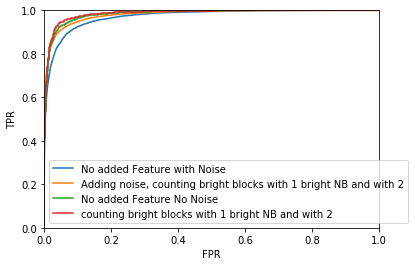

In [48]:
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
plt.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
plt.plot(fpr3te,tpr3te, label="Adding noise, counting bright blocks with 1 bright NB and with 2")

fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
plt.plot(fpr1Tte,tpr1Tte, label="No added Feature No Noise")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
plt.plot(fprTte,tprTte, label="counting bright blocks with 1 bright NB and with 2")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

In [50]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr2.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

TurnOn Loaded
TurnOnOnce Loaded


0.157 0.983278

In [54]:
w1=new_lr2.w_G[-10:]
print(w1)

[-1.53951285e-01  5.26440839e-02  8.79076479e-04 -1.02381199e-01
 -9.10931411e-03 -8.49692821e-02 -2.84764204e-01 -7.12042116e-01
  3.18117987e+00 -5.66442689e-01]
